In [6]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
import re
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(r'/content/drive/MyDrive/DataScience/malagnant comments/train.csv')
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


## Pre-Processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


#### Droping Unwanted columns

From above, we see that 'id' is just a representation of the comment, which is also represented by index. Hence, we could drop 'id'.

In [ ]:
df.drop('id',axis=1,inplace=True)

#### Checking Duplicates

In [ ]:
df.duplicated().sum()

0

We see that we do not have any duplicates in the dataset.

#### Checking Null Values

In [ ]:
df.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

We see, we do not have any Null Values in the dataset.

#### Checking Basic Info

In [ ]:
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.dtypes

comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

#### Checking Distribution

In [ ]:
df['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

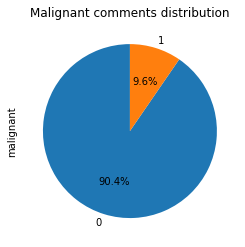

In [ ]:
df['malignant'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Malignant comments distribution')
plt.show()

We see that the dataset has majority of comments which are not malignant

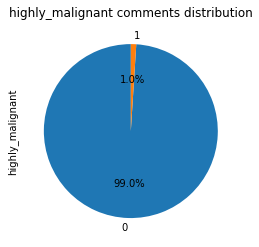

In [ ]:
df['highly_malignant'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('highly_malignant comments distribution')
plt.show()

We see highly_malignant comments are very few, about 1%

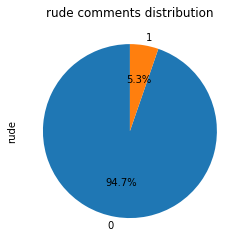

In [ ]:
df['rude'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('rude comments distribution')
plt.show()

We see that the rude comments are about 5.3%

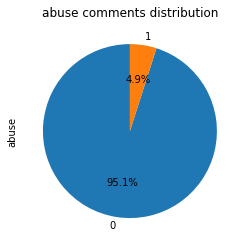

In [ ]:
df['abuse'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('abuse comments distribution')
plt.show()

We see the comments tagged abusive are less than 5%.

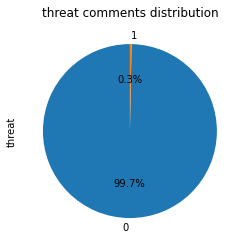

In [ ]:
df['threat'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('threat comments distribution')
plt.show()

We see that threat commets are less than 1%.

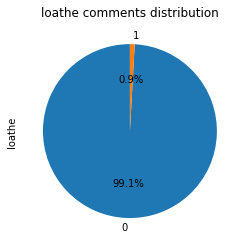

In [ ]:
df['loathe'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('loathe comments distribution')
plt.show()

We see that loathe commets are less than 1%.

#### Checking the distribution of the toxic comments

In [ ]:
y = df.drop('comment_text',axis=1)

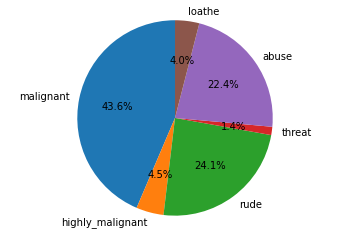

In [ ]:
labels = y.columns
sizes = y.sum()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
plt.show()

From above, we see that majority of the comments are malignant followed by abuse and the least are Threat

#### Feature Engineering

##### - Let's create a column that displays the number of classes of Toxicity in a comment

In [ ]:
df.columns

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [ ]:
df['Toxic Level'] = df['malignant']+df['highly_malignant']+df['rude']+df['threat']+df['abuse']+df['loathe']

In [ ]:
toxic_comments = df[df['Toxic Level']>0]
toxic_comments

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Toxic Level
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
12,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,1
16,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,1
42,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,4
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,3
...,...,...,...,...,...,...,...,...
159494,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1,4
159514,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0,2
159541,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0,3
159546,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0,2


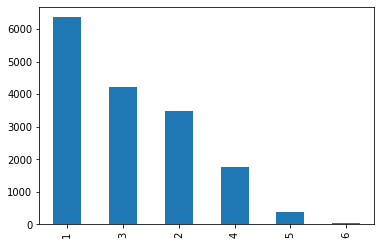

In [ ]:
toxic_comments['Toxic Level'].value_counts().plot(kind='bar')
plt.show()

From the chart we see that majority of the comments are non-toxic, which is followed by level 1 toxicity then 3,2,4,5,6.

##### - Let's create a column to check the length of the comments

In [ ]:
df['comment_length'] = df['comment_text'].str.len()

In [ ]:
df.sample(5)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Toxic Level,comment_length
20974,"According to this blog, it may be New Zealand ...",0,0,0,0,0,0,0,166
55545,"""\n\n Blocking Mardyks (2012) \n\nExcellent wo...",1,0,0,0,0,0,1,1306
151249,"""* Quite so. There are several proportional v...",0,0,0,0,0,0,0,230
126032,"said intersection to stop, triggering the walk...",0,0,0,0,0,0,0,959
68950,"PLEASE STOP IDIOT User: J Milburn,who is a pic...",1,0,1,0,1,0,3,66


#### - Removing Numbers

In [ ]:
count = 0
for i in range(len(df['comment_text'])):
    z = re.findall('[0-9]',df['comment_text'][i])
    if len(z)>1:
        count+=1
print(count)

45530


In [ ]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [8]:
def remove_numbers(text):
    return re.sub("\d+", "", text)

In [ ]:
df['comment_text'] = df['comment_text'].apply(remove_numbers)

In [ ]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now...."

#### - Removing Emojis

In [ ]:
df['comment_text'][107479]

"Ok maybe I was wrong? I'm sorry for what I did mate please don't take what I say seriously at the end of the day I'm only  and I have just lost my best friend to a car accident 😔 please forgive me mate 💜"

From above, we see that the text does contain Emoji's. Let's replace them with their meanings.

In [9]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import emoji

In [11]:
def remove_emoji(text):
    return emoji.demojize(text)

In [ ]:
df['comment_text'] = df['comment_text'].apply(remove_emoji)

In [ ]:
df['comment_text'][107479]

"Ok maybe I was wrong? I'm sorry for what I did mate please don't take what I say seriously at the end of the day I'm only  and I have just lost my best friend to a car accident :pensive_face: please forgive me mate :purple_heart:"

We see the Emojis have been removed

#### - Chat Words Treatment

In [ ]:
len(df['comment_text'][df['comment_text'].str.contains('lol')])

562

In [ ]:
len(df['comment_text'][df['comment_text'].str.contains('wtf')])

49

In [ ]:
len(df['comment_text'][df['comment_text'].str.contains('asap')])

40

In [ ]:
df['comment_text'][2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

We see that the dataset does contain chat words, lets replace them with their actual words.

In [12]:
chat_words = {
    "I'M":'i am',
    'DOIN':'DOING',
    'U':'you',
    'URS':'Yours',
    'R':'Are',
    'AFAIK':'As Far As I Know',
    'AFK':'Away From Keyboard',
    'ASAP':'As Soon As Possible',
    'ATK':'At The Keyboard',
    'ATM':'At The Moment',
    'A3':'Anytime, Anywhere, Anyplace',
    'BAK':'Back At Keyboard',
    'BBL':'Be Back Later',
    'BBS':'Be Back Soon',
    'BFN':'Bye For Now',
    'B4N':'Bye For Now',
    'BRB':'Be Right Back',
    'BRT':'Be Right There',
    'BTW':'By The Way',
    'B4':'Before',
    'B4N':'Bye For Now',
    'CU':'See You',
    'CUL8R':'See You Later',
    'CYA':'See You',
    'FAQ':'Frequently Asked Questions',
    'FC':'Fingers Crossed',
    'FWIW':"For What It's Worth",
    'FYI':'For Your Information',
    'GAL':'Get A Life',
    'GG':'Good Game',
    'GN':'Good Night',
    'GMTA':'Great Minds Think Alike',
    'GR8':'Great!',
    'G9':'Genius',
    'IC':'I See',
    'ICQ':'I Seek you',
    'ILU': 'I Love You',
    'IMHO':'In My Honest/Humble Opinion',
    'IMO':'In My Opinion',
    'IOW':'In Other Words',
    'IRL':'In Real Life',
    'KISS':'Keep It Simple, Stupid',
    'LDR':'Long Distance Relationship',
    'LMAO':'Laugh My A.. Off',
    'LOL':'Laughing Out Loud',
    'LTNS':'Long Time No See',
    'L8R':'Later',
    'MTE':'My Thoughts Exactly',
    'M8':'Mate',
    'NRN':'No Reply Necessary',
    'OIC':'Oh I See',
    'PITA':'Pain In The A..',
    'PRT':'Party',
    'PRW':'Parents Are Watching',
    'QPSA?':'Que Pasa?',
    'ROFL':'Rolling On The Floor Laughing',
    'ROFLOL':'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO':'Rolling On The Floor Laughing My A.. Off',
    'SK8':'Skate',
    'STATS':'Your sex and age',
    'ASL':'Age, Sex, Location',
    'THX':'Thank You',
    'TTFN':'Ta-Ta For Now!',
    'TTYL':'Talk To You Later',
    'U':'You',
    'U2':'You Too',
    'U4E':'Yours For Ever',
    'WB':'Welcome Back',
    'WTF':'What The F...',
    'WTG':'Way To Go!',
    'WUF':'Where Are You From?',
    'W8':'Wait...',
    '7K':'Sick:-D Laugher'}

In [13]:
def chat_conversations(text):
    new_text = []
    for w in text.split():
        if w in chat_words:
            new_text.append(chat_words[w])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [ ]:
df['comment_text'] = df['comment_text'].str.upper()

In [ ]:
df['comment_text'] = df['comment_text'].apply(chat_conversations)

In [ ]:
df['comment_text'][2],df['comment_text'][325]

("HEY MAN, i am REALLY NOT TRYING TO EDIT WAR. IT'S JUST THAT THIS GUY IS CONSTANTLY REMOVING RELEVANT INFORMATION AND TALKING TO ME THROUGH EDITS INSTEAD OF MY TALK PAGE. HE SEEMS TO CARE MORE ABOUT THE FORMATTING THAN THE ACTUAL INFO.",
 "Laughing Out Loud CENSORSHIP. YOU'RE REALLY DISAPPOINTED THAT NPOV IS A CORE POLICY, AREN'T YOU? (TALK ⋅ CONTRIBS)")

#### - Lower Casing

In [ ]:
df['comment_text'] = df['comment_text'].str.lower()
df['comment_text'].head(3)

0    explanation why the edits made under my userna...
1    d'aww! he matches this background colour i am ...
2    hey man, i am really not trying to edit war. i...
Name: comment_text, dtype: object

#### - Removing Email addresses

In [ ]:
count = 0
for i in range(len(df)):
    z = re.findall('[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+',df['comment_text'][i])
    if len(z)>3:
        print(i,z)
        print()
        print('*'*50)
        count+=1
print(count)

8283 ['lmclearie@aol.com', 'lensman@sbcglobal.net', 'jagdish.mann@gmail.com', 'd@gmail.com', 'rmt@protium.de', 'dwishnie@aol.com', 'sirag@mindspring.com', 'fred@fredalanwolf.com', 'rebeccapaxton@mac.com']

**************************************************
11043 ['rmsa@hotmail.com', 'rmssa@hotmail.com', 'rmsa@hotmail.com', 'requests_for_checkuser_case_rmsa@hotmail.com_bfd.html']

**************************************************
22862 ['valentino@msn.com', 'washington.field@ic.fbi.gov', 'washington.field@ic.fbi.gov', 'newyork@fbi.gov']

**************************************************
68748 ['ana@rusk.ru', 'esm@rossia.ru', 'kontakt@edrus.org', 'kruglov_ag@ukr.net', 'pravaya@pravaya.ru', 'rg@rusk.ru', 'sevkrimrus@narod.ru', 'sevkrimrus@ya.ru', 'sevrus@narod.ru']

**************************************************
94379 ['a@hotmail.com', 'rmssa@hotmail.com', 'rmsa@hotmail.com', 'requests_for_checkuser_case_rmsa@hotmail.com_bfd.html']

**************************************************

In [14]:
def remove_emails(text):
    pattern = re.compile('[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+')
    return pattern.sub(r'',text)

In [15]:
df['comment_text'] = df['comment_text'].apply(remove_emails)

In [ ]:
count = 0
for i in range(len(df)):
    z = re.findall('[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+',df['comment_text'][i])
    if len(z)>3:
        print(i,z)
        print()
        print('*'*50)
        count+=1
print(count)

0


We do not have Emails anymore.

#### - Removing Weblinks

In [16]:
import re

In [ ]:
count = 0
for i in range(len(df)):
    z = re.findall('http\S+|www\S+',df['comment_text'][i])
    if len(z)>3:
        print(i,z)
        print()
        print('*'*50)
        count+=1
print(count)

363 ['https://en.wikinews.org/wiki/wikinews_interviews_scott_lucas,_eyal_zisser,_majid_rafizadeh_about_risks_of_us_military_intervention_in_syria', 'http://www.cnn.com////opinion/iran-rouhani-syria-rafizadeh/index.html', 'http://globalpublicsquare.blogs.cnn.com////jobs-key-to-middle-easts-revolutionary-wave/', 'http://edition.cnn.com////world/meast/syria-shiites', 'http://www.bbc.co.uk/programmes/pgsjfk', 'http://www.france.com/en/-syria-majid-rafizadeh-kidnap-family-targetted-civil-war-shabiha-opposition-bashar-assad', 'https://scholar.google.com/scholar?hl=en&q;=majid+rafizadeh+&btng;=&as;_sdt=%c&as;_sdtp=']

**************************************************
4291 ['http://www.u-s-history.com/pages/h.html', 'http://www.biography.com/articles/christopher-columbus-', 'http://history.howstuffworks.com/north-american-history/christopher-columbus.htm', 'http://www.questia.com/library/encyclopedia/columbus_christopher.jsp', 'http://www.lycos.com/info/christopher-columbuscentral-america.htm

From above, we see that there are a lot of weblinks in the dataset as they are of no use to us. We remove them.

In [17]:
def remove_html_tags(text):
    pattern = re.compile('http\S+|www\S+')
    return pattern.sub(r'',text)

In [ ]:
df['comment_text'] = df['comment_text'].apply(remove_html_tags)

In [ ]:
count = 0
for i in range(len(df)):
    z = re.findall('http\S+|www\S+',df['comment_text'][i])
    if len(z)>3:
        print(i,z)
        print()
        print('*'*50)
        count+=1
print(count)

0


We see we do not have any more weblinks.

#### - Removing Punctuations

In [ ]:
df['comment_text'][0]

"explanation why the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i am retired now...."

In [18]:
import string
exclude = string.punctuation+ ('·')+('•')
exclude 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~·•'

In [19]:
def remove_punctuations(text):
    return text.translate(str.maketrans('','',exclude))

In [ ]:
df['comment_text'] = df['comment_text'].apply(remove_punctuations)

In [ ]:
df['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted they werent vandalisms just closure on some gas after i voted at new york dolls fac and please dont remove the template from the talk page since i am retired now'

#### - Removing Stop Words

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords

# Initialize the stopwords
stoplist = stopwords.words('english')

In [22]:
stoplist

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
df['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [24]:
def remove_stopwords(text):
    new_text = []
    for words in text.split():
        if words in stoplist:
            new_text.append('')
        else:
            new_text.append(words)
    return " ".join(new_text)

In [ ]:
for i in tqdm(range(len(df))):
    df['comment_text'][i] = remove_stopwords(df['comment_text'][i])

100%|██████████| 159571/159571 [04:47<00:00, 555.63it/s]


In [ ]:
df['comment_text'][1]

'daww  matches  background colour   seemingly stuck  thanks talk january utc'

#### Length of cleaned text

In [ ]:
df['cleaned_comment_length'] = df['comment_text'].str.len()

In [ ]:
df.sample(5)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Toxic Level,comment_length,cleaned_comment_length
116216,considering sources antidiskriminator presen...,0,0,0,0,0,0,0,242,191
64820,yes hitler stated slavs lesser races sa...,1,0,0,0,0,0,1,87,58
149757,also looking articles kawartha lakes ...,0,0,0,0,0,0,0,169,115
93305,made comment never edited article afd ...,0,0,0,0,0,0,0,100,65
60232,related projects made stuff somewhat rela...,0,0,1,0,0,0,1,479,322


#### Percentage reduction in corpus

In [ ]:
comment_total_words = df['comment_length'].sum()
cleaned_comment_total_words = df['cleaned_comment_length'].sum()

In [ ]:
percentage_reduction = (comment_total_words - cleaned_comment_total_words)/comment_total_words*100
percentage_reduction

29.014111716176316

#### WordCloud of the Type of Comments

In [ ]:
df.columns

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'Toxic Level', 'comment_length',
       'cleaned_comment_length'],
      dtype='object')

In [ ]:
from wordcloud import WordCloud

##### - **Non-Toxic Comments**

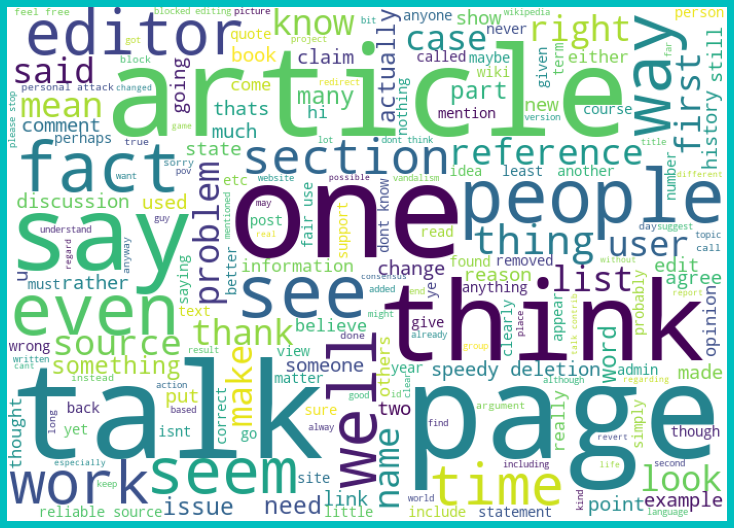

In [ ]:
Non_toxic_words = df['comment_text'][df['Toxic Level'] == 0]

non_toxic_cloud = WordCloud(width=700,height=500,background_color='white').generate(' '.join (Non_toxic_words))
plt.figure(figsize=(10,8),facecolor='c')
plt.imshow(non_toxic_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##### - **Malignant Comments**

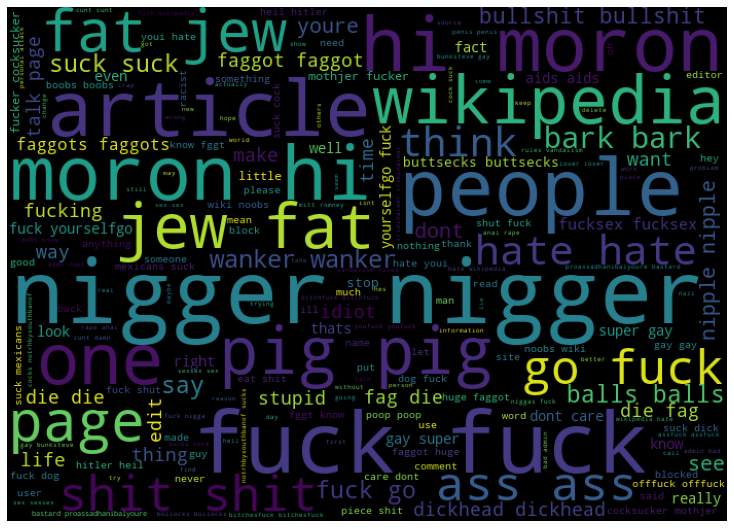

In [ ]:
malignant_rating = df['comment_text'][df['malignant'] > 0]

malignant_rating_cloud = WordCloud(width=700,height=500).generate(' '.join (malignant_rating))
plt.figure(figsize=(10,8),facecolor='w')
plt.imshow(malignant_rating_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##### - **Highly Malignant Comments**

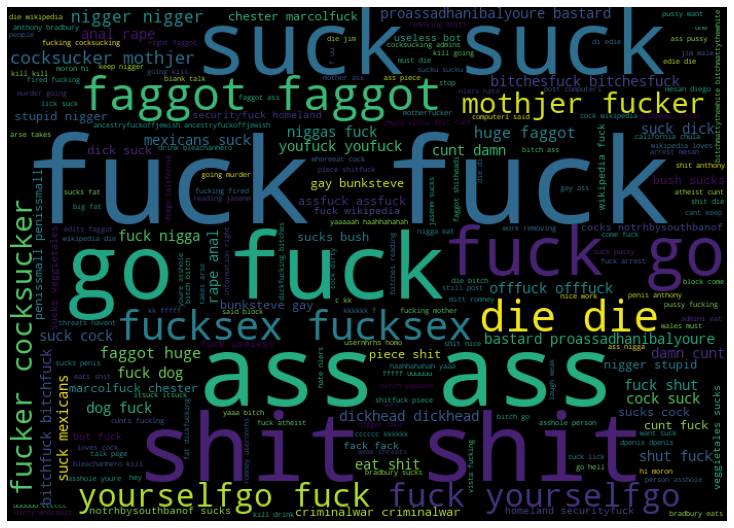

In [ ]:
highly_malignant_rating = df['comment_text'][df['highly_malignant'] > 0]

highly_malignant_cloud = WordCloud(width=700,height=500).generate(' '.join (highly_malignant_rating))
plt.figure(figsize=(10,8),facecolor='w')
plt.imshow(highly_malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##### - **Rude Comments**

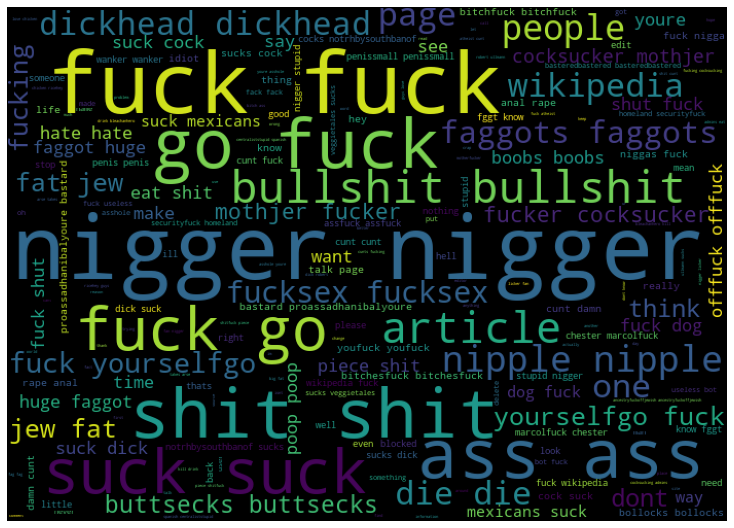

In [ ]:
rude_rating = df['comment_text'][df['rude'] > 0]

rude_cloud = WordCloud(width=700,height=500).generate(' '.join (rude_rating))
plt.figure(figsize=(10,8),facecolor='w')
plt.imshow(rude_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##### - **Threatning Comments**

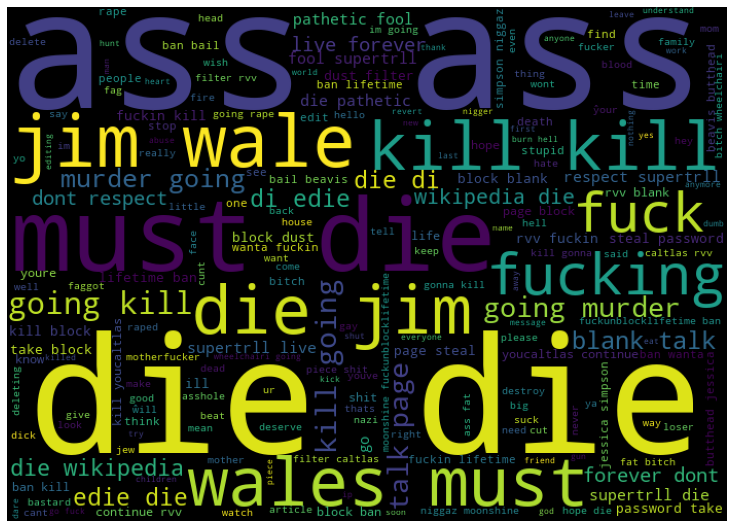

In [ ]:
threat_rating = df['comment_text'][df['threat'] > 0]

threat_rating_cloud = WordCloud(width=700,height=500).generate(' '.join (threat_rating))
plt.figure(figsize=(10,8),facecolor='w')
plt.imshow(threat_rating_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##### - **Abusive Comments**

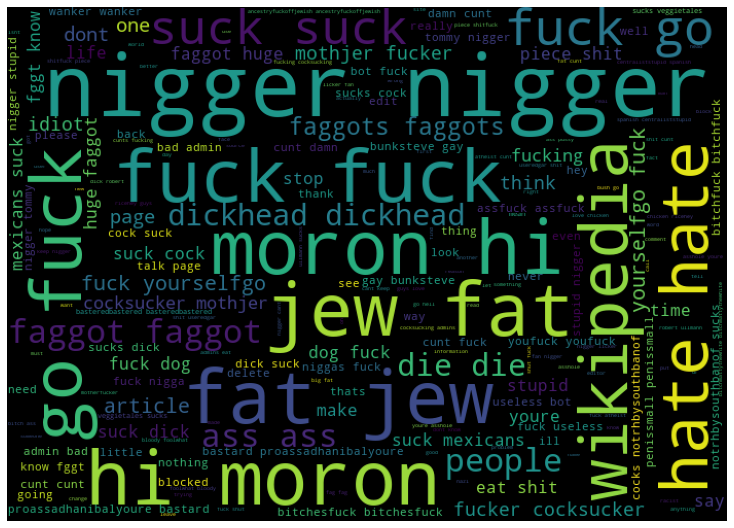

In [ ]:
abuse_rating = df['comment_text'][df['abuse'] > 0]

abuse_rating_cloud = WordCloud(width=700,height=500).generate(' '.join (abuse_rating))
plt.figure(figsize=(10,8),facecolor='w')
plt.imshow(abuse_rating_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##### - **Loathe Comments**

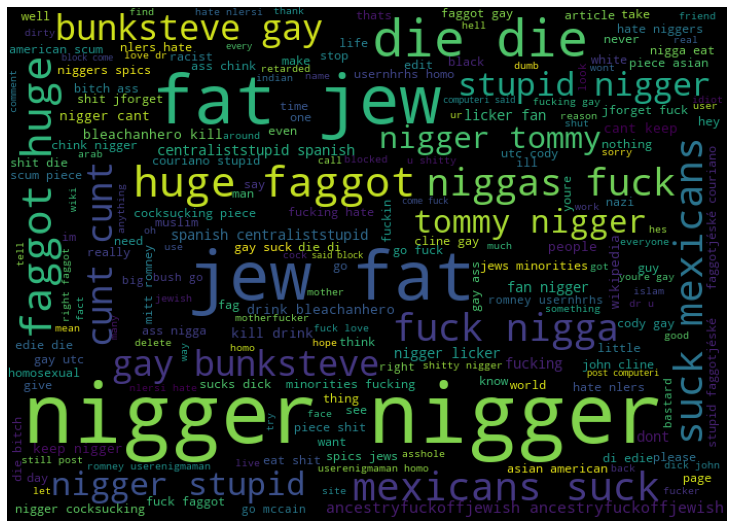

In [ ]:
loathe_rating = df['comment_text'][df['loathe'] > 0]

loathe_rating_cloud = WordCloud(width=700,height=500).generate(' '.join (loathe_rating))
plt.figure(figsize=(10,8),facecolor='w')
plt.imshow(loathe_rating_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Lemmatization

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatiser = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
for i in tqdm(range(len(df))):
    text = df['comment_text'][i]
    document = []
    token = nltk.word_tokenize(text)
    for words in token:
        word = lemmatiser.lemmatize(words,pos="v")
        document.append(word)
    df['comment_text'][i] = ' '.join(document)

100%|██████████| 159571/159571 [05:01<00:00, 528.79it/s]


In [ ]:
df.to_csv('/content/drive/MyDrive/DataScience/cleaned_lemmatized_test_data.csv', sep = ',')

In [38]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
import re
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/cleaned_lemmatized_test_data.csv')
df

,Unnamed: 0,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Toxic Level,comment_length,cleaned_comment_length
0,0,explanation edit make username hardcore metall...,0,0,0,0,0,0,0,264,189
1,1,daww match background colour seemingly stick t...,0,0,0,0,0,0,0,112,75
2,2,hey man really try edit war guy constantly rem...,0,0,0,0,0,0,0,233,163
3,3,cant make real suggestions improvement wonder ...,0,0,0,0,0,0,0,622,437
4,4,sir hero chance remember page thats,0,0,0,0,0,0,0,67,42
...,...,...,...,...,...,...,...,...,...,...,...
159566,159566,second time ask view completely contradict cov...,0,0,0,0,0,0,0,295,207
159567,159567,ashamed horrible thing put talk page,0,0,0,0,0,0,0,99,47
159568,159568,spitzer umm theres actual article prostitution...,0,0,0,0,0,0,0,81,68
159569,159569,look like actually put speedy first version de...,0,0,0,0,0,0,0,116,73


In [40]:
df.drop('Unnamed: 0',axis=1,inplace=True)

#### Checking for Null Values

In [41]:
df.isnull().sum()

comment_text              120
malignant                   0
highly_malignant            0
rude                        0
threat                      0
abuse                       0
loathe                      0
Toxic Level                 0
comment_length              0
cleaned_comment_length      0
dtype: int64

In [42]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [43]:
df.isnull().sum()

index                     0
comment_text              0
malignant                 0
highly_malignant          0
rude                      0
threat                    0
abuse                     0
loathe                    0
Toxic Level               0
comment_length            0
cleaned_comment_length    0
dtype: int64

In [44]:
df.drop('index',axis=1,inplace=True)

### Splitting the Dataframe for Training and Testing

In [45]:
df.columns

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'Toxic Level', 'comment_length',
       'cleaned_comment_length'],
      dtype='object')

In [46]:
X = df['comment_text']
y = df.drop(['comment_text','Toxic Level','comment_length','cleaned_comment_length'],axis=1)

#### Train - Test Split

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

In [48]:
x_train.shape,x_test.shape

((111615,), (47836,))

### ---> Using TFiDF

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tfidf = TfidfVectorizer(min_df=5)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [72]:
x_train_tfidf.shape

(111615, 24177)

In [ ]:
x_test_tfidf

<47836x24177 sparse matrix of type '<class 'numpy.float64'>'
	with 1187038 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier1 = OneVsRestClassifier(LogisticRegression(class_weight='balanced'), n_jobs=-1)
classifier1.fit(x_train_tfidf, y_train)
predictions = classifier1.predict(x_test_tfidf)

accuracy = metrics.accuracy_score(y_test, predictions)
hamming = metrics.hamming_loss(y_test,predictions)
print("Accuracy :",accuracy)
print("AUC :",roc_auc_score(y_test,predictions))
print("Hamming loss ",hamming)
print("\nClassification Report")
print (metrics.classification_report(y_test, predictions))

Accuracy : 0.8697633581403127
AUC : 0.895538609468863
Hamming loss  0.03384131895085988

Classification Report
              precision    recall  f1-score   support

           0       0.63      0.85      0.72      4627
           1       0.26      0.87      0.40       486
           2       0.66      0.88      0.75      2510
           3       0.19      0.69      0.29       153
           4       0.52      0.86      0.65      2348
           5       0.20      0.77      0.31       400

   micro avg       0.52      0.85      0.65     10524
   macro avg       0.41      0.82      0.52     10524
weighted avg       0.57      0.85      0.68     10524
 samples avg       0.06      0.08      0.07     10524



In [ ]:
from sklearn.linear_model import SGDClassifier

classifier1 = OneVsRestClassifier(SGDClassifier(class_weight='balanced'), n_jobs=-1)
classifier1.fit(x_train_tfidf, y_train)
predictions = classifier1.predict(x_test_tfidf)

accuracy = metrics.accuracy_score(y_test, predictions)
hamming = metrics.hamming_loss(y_test,predictions)
print("Accuracy :",accuracy)
print("AUC :",roc_auc_score(y_test,predictions))
print("Hamming loss ",hamming)
print("\nClassification Report")
print (metrics.classification_report(y_test, predictions))

Accuracy : 0.8624675976252195
AUC : 0.9013175607889536
Hamming loss  0.03739164367143295

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.84      0.72      4627
           1       0.23      0.90      0.36       486
           2       0.65      0.89      0.75      2510
           3       0.15      0.71      0.25       153
           4       0.51      0.88      0.65      2348
           5       0.16      0.80      0.27       400

   micro avg       0.49      0.86      0.63     10524
   macro avg       0.39      0.84      0.50     10524
weighted avg       0.56      0.86      0.67     10524
 samples avg       0.06      0.08      0.06     10524



In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = OneVsRestClassifier(RandomForestClassifier(class_weight='balanced'), n_jobs=-1)
classifier1.fit(x_train_tfidf, y_train)
predictions = classifier1.predict(x_test_tfidf)

accuracy = metrics.accuracy_score(y_test, predictions)
print("AUC :",roc_auc_score(y_test,predictions))
hamming = metrics.hamming_loss(y_test,predictions)
print("Accuracy :",accuracy)
print("Hamming loss ",hamming)
print("\nClassification Report")
print (metrics.classification_report(y_test, predictions))

AUC : 0.6534216790423134
Accuracy : 0.9041934944393344
Hamming loss  0.027768486774256487

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.53      0.65      4627
           1       0.14      0.18      0.16       486
           2       0.75      0.56      0.64      2510
           3       0.55      0.07      0.13       153
           4       0.64      0.46      0.54      2348
           5       0.09      0.09      0.09       400

   micro avg       0.67      0.48      0.56     10524
   macro avg       0.50      0.32      0.37     10524
weighted avg       0.70      0.48      0.57     10524
 samples avg       0.05      0.04      0.04     10524



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
classifier1 = OneVsRestClassifier(ExtraTreesClassifier(class_weight='balanced'), n_jobs=-1)
classifier1.fit(x_train_tfidf, y_train)
predictions = classifier1.predict(x_test_tfidf)

accuracy = metrics.accuracy_score(y_test, predictions)
hamming = metrics.hamming_loss(y_test,predictions)
print("Accuracy :",accuracy)
print("AUC :",roc_auc_score(y_test,predictions))
print("Hamming loss ",hamming)
print("\nClassification Report")
print (metrics.classification_report(y_test, predictions))

Accuracy : 0.9062839702316248
AUC : 0.6608031866632074
Hamming loss  0.026346963235499066

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.56      0.67      4627
           1       0.14      0.16      0.15       486
           2       0.76      0.59      0.67      2510
           3       0.52      0.08      0.14       153
           4       0.66      0.49      0.56      2348
           5       0.10      0.10      0.10       400

   micro avg       0.69      0.51      0.59     10524
   macro avg       0.50      0.33      0.38     10524
weighted avg       0.71      0.51      0.59     10524
 samples avg       0.05      0.04      0.04     10524



### ---> 1-2 grams TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(min_df=5,ngram_range=(1,2))
x_train_tfidf1_2 = tfidf.fit_transform(x_train)
x_test_tfidf1_2 = tfidf.transform(x_test)

In [ ]:
x_train_tfidf1_2.shape

(111615, 105302)

In [ ]:
x_test_tfidf1_2.shape

(47836, 105302)

In [2]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier1 = OneVsRestClassifier(LogisticRegression(class_weight='balanced'), n_jobs=-1)
classifier1.fit(x_train_tfidf1_2, y_train)
predictions = classifier1.predict(x_test_tfidf1_2)

accuracy = metrics.accuracy_score(y_test, predictions)
hamming = metrics.hamming_loss(y_test,predictions)
print("Accuracy :",accuracy)
print("AUC :",roc_auc_score(y_test,predictions))
print("Hamming loss ",hamming)
print("\nClassification Report")
print (metrics.classification_report(y_test, predictions))

Accuracy : 0.8811146416924492
AUC : 0.8897609209477189
Hamming loss  0.02985547844022633

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.83      0.74      4627
           1       0.29      0.85      0.43       486
           2       0.69      0.87      0.77      2510
           3       0.24      0.69      0.35       153
           4       0.56      0.84      0.67      2348
           5       0.23      0.75      0.35       400

   micro avg       0.56      0.84      0.67     10524
   macro avg       0.44      0.80      0.55     10524
weighted avg       0.61      0.84      0.70     10524
 samples avg       0.06      0.08      0.07     10524



In [ ]:
from sklearn.linear_model import SGDClassifier

classifier1 = OneVsRestClassifier(SGDClassifier(class_weight='balanced'), n_jobs=-1)
classifier1.fit(x_train_tfidf1_2, y_train)
predictions = classifier1.predict(x_test_tfidf1_2)

accuracy = metrics.accuracy_score(y_test, predictions)
hamming = metrics.hamming_loss(y_test,predictions)
print("Accuracy :",accuracy)
print("AUC :",roc_auc_score(y_test,predictions))
print("Hamming loss ",hamming)
print("\nClassification Report")
print (metrics.classification_report(y_test, predictions))

Accuracy : 0.8702441675725395
AUC : 0.8971900519894543
Hamming loss  0.034067787161691336

Classification Report
              precision    recall  f1-score   support

           0       0.63      0.83      0.72      4627
           1       0.26      0.89      0.40       486
           2       0.67      0.88      0.76      2510
           3       0.21      0.69      0.32       153
           4       0.52      0.86      0.65      2348
           5       0.19      0.78      0.30       400

   micro avg       0.52      0.85      0.65     10524
   macro avg       0.41      0.82      0.53     10524
weighted avg       0.58      0.85      0.68     10524
 samples avg       0.06      0.08      0.06     10524



In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = OneVsRestClassifier(RandomForestClassifier(class_weight='balanced'), n_jobs=-1)
classifier1.fit(x_train_tfidf1_2, y_train)
predictions = classifier1.predict(x_test_tfidf1_2)

accuracy = metrics.accuracy_score(y_test, predictions)
print("AUC :",roc_auc_score(y_test,predictions))
hamming = metrics.hamming_loss(y_test,predictions)
print("Accuracy :",accuracy)
print("Hamming loss ",hamming)
print("\nClassification Report")
print (metrics.classification_report(y_test, predictions))

AUC : 0.63854136107317
Accuracy : 0.903859018312568
Hamming loss  0.02785907405858907

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.49      0.62      4627
           1       0.13      0.13      0.13       486
           2       0.76      0.53      0.63      2510
           3       0.58      0.07      0.13       153
           4       0.66      0.42      0.51      2348
           5       0.07      0.07      0.07       400

   micro avg       0.69      0.44      0.54     10524
   macro avg       0.51      0.28      0.35     10524
weighted avg       0.72      0.44      0.55     10524
 samples avg       0.04      0.04      0.04     10524



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
classifier1 = OneVsRestClassifier(ExtraTreesClassifier(class_weight='balanced'), n_jobs=-1)
classifier1.fit(x_train_tfidf1_2, y_train)
predictions = classifier1.predict(x_test_tfidf1_2)

accuracy = metrics.accuracy_score(y_test, predictions)
hamming = metrics.hamming_loss(y_test,predictions)
print("Accuracy :",accuracy)
print("AUC :",roc_auc_score(y_test,predictions))
print("Hamming loss ",hamming)
print("\nClassification Report")
print (metrics.classification_report(y_test, predictions))


Accuracy : 0.9067020653900828
AUC : 0.653822529067716
Hamming loss  0.02602642361401455

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.53      0.66      4627
           1       0.16      0.16      0.16       486
           2       0.79      0.58      0.66      2510
           3       0.46      0.08      0.13       153
           4       0.68      0.45      0.54      2348
           5       0.11      0.10      0.10       400

   micro avg       0.71      0.48      0.58     10524
   macro avg       0.51      0.32      0.38     10524
weighted avg       0.73      0.48      0.58     10524
 samples avg       0.05      0.04      0.04     10524



### ---> Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(min_df=5)

In [ ]:
x = cvec.fit_transform(X)

In [ ]:
x

<159451x30226 sparse matrix of type '<class 'numpy.int64'>'
	with 4004256 stored elements in Compressed Sparse Row format>

In [ ]:
x.shape

(159451, 30226)

In [3]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,hamming_loss

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)

In [ ]:
LR = OneVsRestClassifier(LogisticRegression(class_weight='balanced',n_jobs=-1))
LR.fit(x_train,y_train)
pred = LR.predict(x_test)
accuracy = accuracy_score(y_test, pred)
loss = hamming_loss(y_test,pred)
print("Accuracy :",accuracy)
print("AUC :",roc_auc_score(y_test,pred))
print("Hamming loss :",loss)
print("\nClassification Report")
print(classification_report(y_test,pred))

Accuracy : 0.8613387406973827
AUC : 0.8739694713214908
Hamming loss : 0.03458692198344343

Classification Report
              precision    recall  f1-score   support

           0       0.65      0.83      0.73      4627
           1       0.24      0.83      0.38       486
           2       0.65      0.86      0.74      2510
           3       0.20      0.62      0.30       153
           4       0.48      0.82      0.61      2348
           5       0.19      0.71      0.30       400

   micro avg       0.52      0.83      0.64     10524
   macro avg       0.40      0.78      0.51     10524
weighted avg       0.57      0.83      0.67     10524
 samples avg       0.06      0.08      0.07     10524



In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier
sgd = OneVsRestClassifier(SGDClassifier(class_weight='balanced',n_jobs=-1))
sgd.fit(x_train,y_train)
pred = sgd.predict(x_test)
accuracy = accuracy_score(y_test, pred)
loss = hamming_loss(y_test,pred)
print("Accuracy :",accuracy)
print("AUC :",roc_auc_score(y_test,pred))
print("Hamming loss :",loss)
print("\nClassification Report")
print(classification_report(y_test,pred))

Accuracy : 0.8031189898820972
AUC : 0.8770544921188471
Hamming loss : 0.050906569668589904

Classification Report
              precision    recall  f1-score   support

           0       0.65      0.83      0.73      4627
           1       0.24      0.83      0.37       486
           2       0.54      0.87      0.67      2510
           3       0.03      0.75      0.06       153
           4       0.45      0.84      0.59      2348
           5       0.15      0.68      0.24       400

   micro avg       0.41      0.84      0.55     10524
   macro avg       0.34      0.80      0.44     10524
weighted avg       0.53      0.84      0.64     10524
 samples avg       0.06      0.08      0.06     10524



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier
rf = OneVsRestClassifier(rf(class_weight='balanced',n_jobs=-1))
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
loss = hamming_loss(y_test,pred)
print("Accuracy :",accuracy)
print("AUC :",roc_auc_score(y_test,pred))
print("Hamming loss :",loss)
print("\nClassification Report")
print(classification_report(y_test,pred))

Accuracy : 0.9026674471109625
AUC : 0.6613436251842068
Hamming loss : 0.027925272458678263

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.54      0.65      4627
           1       0.14      0.20      0.17       486
           2       0.74      0.59      0.66      2510
           3       0.39      0.08      0.14       153
           4       0.64      0.45      0.53      2348
           5       0.10      0.12      0.11       400

   micro avg       0.66      0.49      0.56     10524
   macro avg       0.47      0.33      0.38     10524
weighted avg       0.70      0.49      0.58     10524
 samples avg       0.05      0.04      0.04     10524



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier
et = OneVsRestClassifier(et(class_weight='balanced',n_jobs=-1))
et.fit(x_train,y_train)
pred = et.predict(x_test)
accuracy = accuracy_score(y_test, pred)
loss = hamming_loss(y_test,pred)
print("Accuracy :",accuracy)
print("AUC :",roc_auc_score(y_test,pred))
print("Hamming loss :",loss)
print("\nClassification Report")
print(classification_report(y_test,pred))

Accuracy : 0.8984237812526131
AUC : 0.6303206225929733
Hamming loss : 0.03057669258856649

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.41      0.54      4627
           1       0.19      0.22      0.20       486
           2       0.73      0.42      0.53      2510
           3       0.38      0.08      0.14       153
           4       0.62      0.36      0.45      2348
           5       0.13      0.12      0.12       400

   micro avg       0.64      0.38      0.47     10524
   macro avg       0.47      0.27      0.33     10524
weighted avg       0.68      0.38      0.48     10524
 samples avg       0.04      0.03      0.03     10524



#### We see the best AUC Score is for TF-iDF(1,1) gram

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1]
penalty=['l1','l2']

params  = {"estimator__C":alpha,
           "estimator__penalty":penalty}

base_estimator = OneVsRestClassifier(LogisticRegression(class_weight='balanced'), n_jobs=-1)
rsearch_cv = RandomizedSearchCV(estimator=base_estimator, param_distributions=params, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1, verbose=0)
rsearch_cv.fit(x_train_tfidf , y_train)

print("Best estimator: ",rsearch_cv.best_estimator_)

Best estimator:  OneVsRestClassifier(estimator=LogisticRegression(C=1, class_weight='balanced'),
                    n_jobs=-1)


In [ ]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier1 = OneVsRestClassifier(estimator=LogisticRegression(C=1, class_weight='balanced'),n_jobs=-1)
classifier1.fit(x_train_tfidf, y_train)
predictions = classifier1.predict(x_test_tfidf)

accuracy = metrics.accuracy_score(y_test, predictions)
hamming = metrics.hamming_loss(y_test,predictions)
print("Accuracy :",accuracy)
print("AUC :",roc_auc_score(y_test,predictions))
print("Hamming loss ",hamming)
print("\nClassification Report")
print (metrics.classification_report(y_test, predictions))

Accuracy : 0.8697633581403127
AUC : 0.895538609468863
Hamming loss  0.03384131895085988

Classification Report
              precision    recall  f1-score   support

           0       0.63      0.85      0.72      4627
           1       0.26      0.87      0.40       486
           2       0.66      0.88      0.75      2510
           3       0.19      0.69      0.29       153
           4       0.52      0.86      0.65      2348
           5       0.20      0.77      0.31       400

   micro avg       0.52      0.85      0.65     10524
   macro avg       0.41      0.82      0.52     10524
weighted avg       0.57      0.85      0.68     10524
 samples avg       0.06      0.08      0.07     10524



In [ ]:
from sklearn.linear_model import SGDClassifier
alph = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1]
for i in alph:
  classifier1 = OneVsRestClassifier(SGDClassifier(class_weight='balanced',alpha=i), n_jobs=-1)
  classifier1.fit(x_train_tfidf, y_train)
  predictions = classifier1.predict(x_test_tfidf)

  accuracy = metrics.accuracy_score(y_test, predictions)
  hamming = metrics.hamming_loss(y_test,predictions)
  print('For alpha',i)
  print("Accuracy :",accuracy)
  print("AUC :",roc_auc_score(y_test,predictions))
  print("Hamming loss ",hamming)
  print('*'*100)

For alpha 1e-06
Accuracy : 0.8597081695793962
AUC : 0.85007673619333
Hamming loss  0.033677565013797144
****************************************************************************************************
For alpha 1e-05
Accuracy : 0.8648507400284304
AUC : 0.8813562000806603
Hamming loss  0.03400158876160214
****************************************************************************************************
For alpha 0.0001
Accuracy : 0.8624048833514508
AUC : 0.9004346422605333
Hamming loss  0.03763553251386682
****************************************************************************************************
For alpha 0.001
Accuracy : 0.8721255957856008
AUC : 0.8848457153422129
Hamming loss  0.03723485798701118
****************************************************************************************************
For alpha 0.01
Accuracy : 0.8885985450288486
AUC : 0.768731001460714
Hamming loss  0.03564261225855005
*************************************************************************

We see SGDClassifier with default parameters has the best results. Hence we choose it to be our final model.

## Final Model

In [ ]:
from sklearn.linear_model import SGDClassifier

classifier1 = OneVsRestClassifier(SGDClassifier(class_weight='balanced'), n_jobs=-1)
classifier1.fit(x_train_tfidf, y_train)
predictions = classifier1.predict(x_test_tfidf)

accuracy = metrics.accuracy_score(y_test, predictions)
hamming = metrics.hamming_loss(y_test,predictions)
print("Accuracy :",accuracy)
print("AUC :",roc_auc_score(y_test,predictions))
print("Hamming loss ",hamming)
print("\nClassification Report")
print (metrics.classification_report(y_test, predictions))

Accuracy : 0.8627602642361402
AUC : 0.9022658296770233
Hamming loss  0.03733589765030521

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.84      0.72      4627
           1       0.23      0.91      0.37       486
           2       0.65      0.89      0.75      2510
           3       0.16      0.70      0.26       153
           4       0.51      0.88      0.65      2348
           5       0.16      0.81      0.26       400

   micro avg       0.49      0.86      0.63     10524
   macro avg       0.39      0.84      0.50     10524
weighted avg       0.56      0.86      0.67     10524
 samples avg       0.06      0.08      0.06     10524



### Saving the Model

In [ ]:
import pickle
with open('/content/drive/MyDrive/DataScience/malagnant comments/malignant_comments_classifier_final_model.pkl', 'wb') as final1:
  pickle.dump(classifier1, final1)

In [54]:
import pickle
with open('/content/drive/MyDrive/DataScience/malagnant comments/malignant_comments_classifier_final_model.pkl', 'rb') as final1:
  model = pickle.load(final1)

In [55]:
model

OneVsRestClassifier(estimator=SGDClassifier(class_weight='balanced'), n_jobs=-1)

## Test Data

In [25]:
test_x = pd.read_csv('/content/drive/MyDrive/DataScience/malagnant comments/test.csv')

In [26]:
test_x.sample(4)

,id,comment_text
132292,dd12914402b7db66,==EffK is forced to Abandon a Corrupted Wikipe...
116473,c25cd82dd14a7b11,==Fall webworm== \n See Fall webworm. I hesita...
80088,859f6cf8597607bf,:If this article is the Republic of Kosovo art...
150695,fbea0fb3e3620d7d,== Relation to ice luge == \n\n Other than the...


In [27]:
test_x['comment_text'] = test_x['comment_text'].apply(remove_numbers)

In [28]:
test_x['comment_text'] = test_x['comment_text'].apply(remove_emoji)

In [29]:
test_x['comment_text'] = test_x['comment_text'].str.upper()

In [30]:
test_x['comment_text'] = test_x['comment_text'].apply(chat_conversations)

In [31]:
test_x['comment_text'] = test_x['comment_text'].str.lower()

In [32]:
test_x['comment_text'] = test_x['comment_text'].apply(remove_emails)

In [33]:
test_x['comment_text'] = test_x['comment_text'].apply(remove_html_tags)

In [34]:
test_x['comment_text'] = test_x['comment_text'].apply(remove_punctuations)

In [35]:
test_x['comment_text'] = test_x['comment_text'].apply(remove_stopwords)

In [36]:
test_x['comment_text'][0]

'yo bitch ja rule   succesful  youll ever  whats     hating  sad mofuckasi  bitch slap ur pethedic white faces  get   keep  simple stupid  ass  guys sicken  ja rule   pride  da music man dont diss  shit    nothin  wrong bein like tupac    brother toofuckin white boys get things right next time'

In [51]:
test = tfidf.transform(test_x['comment_text'])

In [52]:
test.shape

(153164, 24177)

In [56]:
predictions = model.predict(test)
predictions

array([[1, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0]])

In [61]:
malignant_comments_predicitions = pd.DataFrame(predictions, columns=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe'])

In [62]:
malignant_comments_predicitions

,malignant,highly_malignant,rude,threat,abuse,loathe
0,1,1,1,0,1,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
153159,0,0,0,0,0,0
153160,0,0,0,0,0,0
153161,0,0,0,0,0,0
153162,0,0,0,0,0,0
